# EDA_stock_data

> 18년도 이래로 계속 상장돼 있는 기업 중 중간의 데이터가 누락된 기업제거   
> 거래량이 0인 거래중지 row는 제거   
> 액면가가 바뀐다거나 상장폐지의 이슈때문에 생긴 이상치는 제거

In [1]:
import data_for_2nd_EDA
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import cufflinks as cf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
cf.go_offline(connected=True)

new_stock_lst = data_for_2nd_EDA.make_stock_data_multi(processes = 20)

---15.999154329299927 seconds ---


In [2]:
new_stock_df = pd.DataFrame(new_stock_lst)

new_stock_df.columns = ['Date', 'code', 'Open', 'High', 'Low', 'Close', 'Change', 'Volume', 'Scaled_volume', 'trading_value', 'ma_5', 'ma_20', 'ma_60', 'ma_120', 'shifting_Change']
new_stock_df

,Date,code,Open,High,Low,Close,Change,Volume,Scaled_volume,trading_value,ma_5,ma_20,ma_60,ma_120,shifting_Change
0,2018-01-02,000210,73734,74367,73373,73916,-0.007279,108903,0.028414,8049674148,73572.4,74606.95,75361.433333,76873.466667,-0.002449
1,2018-01-03,000210,73644,74548,73644,73735,-0.002449,103242,0.026937,7612548870,73662.8,74552.75,75387.033333,76807.958333,0.037987
2,2018-01-04,000210,74367,76807,74096,76536,0.037987,262490,0.068486,20089934640,74259.2,74561.80,75456.300000,76774.825000,-0.005906
3,2018-01-05,000210,76987,77259,75451,76084,-0.005906,145511,0.037965,11071058924,74945.8,74466.90,75528.583333,76734.916667,0.009503
4,2018-01-08,000210,76174,77801,74909,76807,0.009503,158269,0.041294,12156167083,75415.6,74507.55,75612.916667,76704.041667,0.009413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358903,2020-12-21,212310,5300,5300,4200,4770,0.029126,481,0.012719,2294370,4527.0,4553.25,4308.166667,4682.041667,-0.077568
1358904,2020-12-22,212310,4980,4980,4265,4400,-0.077568,6,0.000159,26400,4539.0,4548.75,4301.500000,4668.958333,0.031818
1358905,2020-12-23,212310,4990,4990,4100,4540,0.031818,272,0.007193,1234880,4587.0,4580.75,4302.166667,4663.458333,-0.005507
1358906,2020-12-24,212310,4595,4595,4005,4515,-0.005507,705,0.018643,3183075,4572.0,4584.00,4301.750000,4652.083333,0.027685


In [3]:
print('총 1999개의 기업 중 ',1999 - len(new_stock_df['code'].unique()),'개의 기업이 제거되어 ',
      len(new_stock_df['code'].unique()),'개의 기업의 데이터')

총 1999개의 기업 중  101 개의 기업이 제거되어  1898 개의 기업의 데이터


## change 변수 분석
> trading value, ma값에 따른 상승/하락 추세에 대한 종가의 변화 분포를 확인

In [ ]:
@interact
def show_data_more_than(column = 'shifting_Change', 
                        trading_value = [1000000000,10000000000,100000000000,1000000000000],
                        ):
    
    conditioned_change = new_stock_df[new_stock_df['trading_value'] >= trading_value]['shifting_Change']
    conditioned_change_mean = conditioned_change.mean()
    plt.figure(figsize=(8,5))
    fig=sns.distplot(conditioned_change, hist_kws = dict(edgecolor="black", linewidth=2))
    fig.set_title("trading_value {}".format(trading_value))
    fig.axvline(conditioned_change_mean, color='red')
    print('redline은 평균 값')
    plt.show()

## 상승장 & 하락장 비교

In [9]:
@interact
def show_data_more_than(column = ['ma_5','ma_20','ma_60','ma_120'], 
                        ma_비교값 = ['ma_20','ma_60','ma_120'],
                        trading_value = [0, 1000000000,10000000000,100000000000,1000000000000],
                        ):
    stock_bull = new_stock_df[new_stock_df[column] > new_stock_df[ma_비교값]]
    stock_bull = stock_bull[stock_bull['trading_value'] >= trading_value]['shifting_Change'] # 상승장
    
    stock_bear = new_stock_df[new_stock_df[column] <= new_stock_df[ma_비교값]]
    stock_bear = stock_bear[stock_bear['trading_value'] >= trading_value]['shifting_Change'] # 하락장
    
    stock_bull_mean=stock_bull.mean()
    stock_bear_mean=stock_bear.mean()
    
    print ('raw data의 row개수:',new_stock_df.shape[0])
    print('선택한 변수로 구성한 상승장의 row개수 : {}\n'.format(stock_bull.shape[0]),
          '선택한 변수로 구성한 하락장의 row개수 : {}'.format(stock_bear.shape[0]))
    fig= plt.figure(figsize=(15,5))
    ax = fig.subplots(1,2)
    
    sns.distplot(stock_bull, hist_kws=dict(edgecolor="black", linewidth=2), ax = ax[0])
    _=ax[0].set_title("bull market {} > {}".format(column, ma_비교값))
    _=ax[0].axvline(stock_bull_mean, color='red')
    
    sns.distplot(stock_bear, hist_kws=dict(edgecolor="black", linewidth=2), ax = ax[1])
    _=ax[1].set_title("bear market {} <= {}".format(column, ma_비교값))
    _=ax[1].axvline(stock_bear_mean, color='red')
    
    print('redline은 평균 값')
    plt.show()

interactive(children=(Dropdown(description='column', options=('ma_5', 'ma_20', 'ma_60', 'ma_120'), value='ma_5…

## Volume 변수 분석
> 거래량의 변수는 종목에 따른 편차가 아래와 같이 크기때문에 데이터의 정제가 필수임.   
> 따라서 거래량인 Volume 변수의 특징을 파악하기로함.

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler_data = MinMaxScaler()
scaler_data.fit(np.array(new_stock_df['Volume']).reshape(-1,1))# Nx1 shape으로 바꾸어 주어야 한다.
scaled_Volume = scaler_data.transform(np.array(new_stock_df['Volume']).reshape(-1,1))# Nx1 shape으로 바꾸어 주어야 한다.

new_stock_df['Volume']=scaled_Volume

count    1.358908e+06
mean     9.300090e-04
std      5.689670e-03
min      0.000000e+00
25%      3.750030e-05
50%      1.357706e-04
75%      4.632729e-04
max      1.000000e+00
Name: Volume, dtype: float64


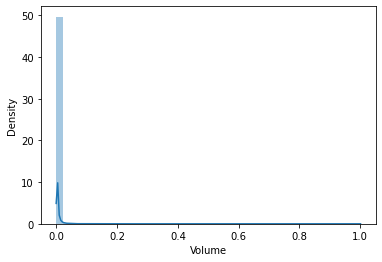

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
sns.distplot(new_stock_df['Volume'])
print(new_stock_df['Volume'].describe())

volume - change lmplot

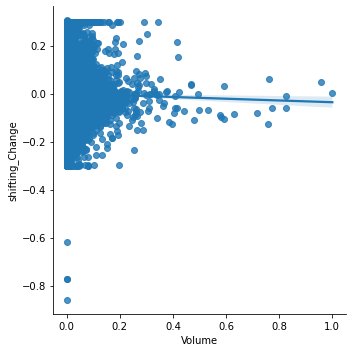

In [10]:
sns.lmplot(x ='Volume', y = 'shifting_Change', data = new_stock_df)

In [11]:
code_lst = new_stock_df['code'].unique() # 기업코드 리스트

com_std_dict={}
for code in code_lst:
    com_std_dict[code] = new_stock_df[new_stock_df['code'] == code]['Volume'].std()

volume의 편차로 회사를 군집화하여 change의 특성을 확인

In [12]:
@interact
def show_data_more_than(column = ['Volume'], 
                        counts = (0,300,25)
                        ):
    high_std_top=[key for key, value in com_std_dict.items() if value in sorted(com_std_dict.values())[:counts]]
    low_std_top=[key for key, value in com_std_dict.items() if value in sorted(com_std_dict.values(),reverse=True)[:counts]]
    
    high_std_df = new_stock_df[new_stock_df['code'].isin(high_std_top)]
    low_std_df = new_stock_df[new_stock_df['code'].isin(low_std_top)]
    
    figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
    figure.set_size_inches(20,12)
    figure.tight_layout()
    
    _=sns.distplot(high_std_df['shifting_Change'],ax = ax1, hist_kws=dict(edgecolor="black", linewidth=2))
    _=sns.distplot(high_std_df['Volume'],ax = ax2, hist_kws=dict(edgecolor="black", linewidth=2))
    _=sns.regplot(y=high_std_df['shifting_Change'],x = high_std_df['Volume'],ax = ax3)
    
    ax1.set_title('shifting_Change distribution',fontsize=16)
    ax2.set_title('Volume distribution',fontsize=16)
    ax3.set_title('shifting_Change - Volume regplot',fontsize=16)
    ax1.set_ylabel('high std {}_company'.format(counts),rotation=0,
                fontsize=16,
                labelpad=100)
    
    
    _=sns.distplot(low_std_df['shifting_Change'],ax = ax4,hist_kws=dict(edgecolor="black", linewidth=2))
    _=sns.distplot(low_std_df['Volume'],ax = ax5,hist_kws=dict(edgecolor="black", linewidth=2))
    _=sns.regplot(y=low_std_df['shifting_Change'],x = low_std_df['Volume'],ax = ax6)
    ax4.set_ylabel('high std {}_company'.format(counts),rotation=0,
                fontsize=16,
                labelpad=100)
    
    high_corr = high_std_df[['Volume','shifting_Change']].corr().iloc[0,1]
    low_corr = low_std_df[['Volume','shifting_Change']].corr().iloc[0,1]
    
    print('편차가 큰 기업들의 Volume - shifting_Change 상관계수:',high_corr)
    print('편차가 작은 기업들의 Volume - shifting_Change 상관계수:',low_corr)
    plt.show()

interactive(children=(Dropdown(description='column', options=('Volume',), value='Volume'), IntSlider(value=150…

## 상한가 / 하한가 분석


In [13]:
import matplotlib.pyplot as plt
@interact
def show_data_more_than(column = ['ma_5','ma_20','ma_60','ma_120'], 
                        ma_비교값 = ['ma_20','ma_60','ma_120'],
                        trading_value = [0, 1000000000,10000000000,100000000000,1000000000000],
                        ):
    upper_line = new_stock_df[new_stock_df['shifting_Change'] > 0.29]
    lower_line = new_stock_df[new_stock_df['shifting_Change'] < -0.29]
    
    conditioned_upper = upper_line[upper_line['trading_value'] > trading_value]
    conditioned_lower = lower_line[lower_line['trading_value'] > trading_value]
    
    print('전체 상한가 개수 중 해당 거래대금 조건의 상한가 ratio:',conditioned_upper.shape[0]/upper_line.shape[0])
    print('\n전체 하한가 개수 중 해당 거래대금 조건의 상한가 ratio:',conditioned_lower.shape[0]/lower_line.shape[0])
    
    # 시각화
    fig = plt.figure(figsize=(14,5))
    ax = fig.subplots(1,2)
    
    upper_Bull_sum = sum(conditioned_upper[column] > conditioned_upper[ma_비교값])
    upper_Bear_sum = sum(conditioned_upper[column] < conditioned_upper[ma_비교값])
    
    lower_Bull_sum = sum(conditioned_lower[column] > conditioned_lower[ma_비교값])
    lower_Bear_sum = sum(conditioned_lower[column] < conditioned_lower[ma_비교값])
    
    data = [[upper_Bull_sum, upper_Bear_sum], [lower_Bull_sum, lower_Bear_sum]]
    i=0
    for data,ax in zip(data,ax):
                  
        x=range(2)
        ax.bar(x,
                data,
                color=['darkred','steelblue'],
               edgecolor='dimgray',
               linewidth=3)

        ax.text(0, data[0]+(data[0]*0.015), '{}'.format(data[0]), ha='center',fontsize=16)
        ax.text(1, data[1]+(data[1]*0.015), '{}'.format(data[1]), ha='center',fontsize=16)
        ax.set_xticks(x)
        ax.set_xticklabels(['Bull market','Bear market'])
        if i==0:
            ax.set_title('upper_line +30%',fontsize=16)
        else:
            ax.set_title('lower_line -30%',fontsize=16)
        i+=1
    plt.show()

interactive(children=(Dropdown(description='column', options=('ma_5', 'ma_20', 'ma_60', 'ma_120'), value='ma_5…

> 상한가 하한가와 거래대금과의 관계는 1000억에서 가장 상승장 인사이트가 잘 맞음.    
> ma5로 구분한 특히(ma5, ma20) 상승/하락장에서 하한가/상한가가 가장 잘 맞아떨어짐.   
> ma20 이상으로 구분한 상승/하락장은 잘 맞아 떨어지지는 않음   
> 이말은 즉, 너무 대형주가 아닌 중소형주들(평소에는 거래량이 그닥 많지 않은)의 상한가 포인트로 볼 수 있을 것 같음.